In [1]:
from google.colab import files

uploaded = files.upload()


Saving DAYTON_hourly.csv to DAYTON_hourly.csv


# New Section

In [2]:
import pandas as pd
from sklearn import metrics
import xgboost as xgb
from sklearn.model_selection import train_test_split
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
df=pd.read_csv('DAYTON_hourly.csv')

In [3]:
df.head()

,Datetime,DAYTON_MW
0,2004-12-31 01:00:00,1596.0
1,2004-12-31 02:00:00,1517.0
2,2004-12-31 03:00:00,1486.0
3,2004-12-31 04:00:00,1469.0
4,2004-12-31 05:00:00,1472.0


In [4]:
df.describe()

,DAYTON_MW
count,121275.000000
mean,2037.851140
std,393.403153
min,982.000000
25%,1749.000000
50%,2009.000000
75%,2279.000000
max,3746.000000


In [5]:
df.isnull().any()

Datetime     False
DAYTON_MW    False
dtype: bool

In [6]:
df['Datetime'] = df.Datetime.astype('Datetime64')
print(df.dtypes)
df.head()

Datetime     datetime64[ns]
DAYTON_MW           float64
dtype: object


,Datetime,DAYTON_MW
0,2004-12-31 01:00:00,1596.0
1,2004-12-31 02:00:00,1517.0
2,2004-12-31 03:00:00,1486.0
3,2004-12-31 04:00:00,1469.0
4,2004-12-31 05:00:00,1472.0


In [7]:
df['Datetime']= pd.to_datetime(df['Datetime'])

df['Year'] = pd.DatetimeIndex(df['Datetime']).year

df['Month'] = pd.DatetimeIndex(df['Datetime']).month

df['Day'] = pd.DatetimeIndex(df['Datetime']).day

df['Time'] = pd.DatetimeIndex(df['Datetime']).time

df['Quarter']=pd.DatetimeIndex(df['Datetime']).quarter

df['Weekday']=pd.DatetimeIndex(df['Datetime']).weekday


df.head()


,Datetime,DAYTON_MW,Year,Month,Day,Time,Quarter,Weekday
0,2004-12-31 01:00:00,1596.0,2004,12,31,01:00:00,4,4
1,2004-12-31 02:00:00,1517.0,2004,12,31,02:00:00,4,4
2,2004-12-31 03:00:00,1486.0,2004,12,31,03:00:00,4,4
3,2004-12-31 04:00:00,1469.0,2004,12,31,04:00:00,4,4
4,2004-12-31 05:00:00,1472.0,2004,12,31,05:00:00,4,4


In [8]:
season_list = []
for quarter in df['Quarter']:
    if(quarter == 1):
      season_list.append("Winter")
    if(quarter == 2):
      season_list.append("Spring")
    if(quarter == 3):
      season_list.append("Summer")
    if(quarter == 4):
      season_list.append("Fall")       
df['Season'] = season_list

In [9]:
df.head()

,Datetime,DAYTON_MW,Year,Month,Day,Time,Quarter,Weekday,Season
0,2004-12-31 01:00:00,1596.0,2004,12,31,01:00:00,4,4,Fall
1,2004-12-31 02:00:00,1517.0,2004,12,31,02:00:00,4,4,Fall
2,2004-12-31 03:00:00,1486.0,2004,12,31,03:00:00,4,4,Fall
3,2004-12-31 04:00:00,1469.0,2004,12,31,04:00:00,4,4,Fall
4,2004-12-31 05:00:00,1472.0,2004,12,31,05:00:00,4,4,Fall


In [10]:
Isweekday =[]
for day in df['Weekday']:
  if(day==5 or day==6):
    Isweekday.append("false")
  else:
    Isweekday.append("true")
df['Isweekday'] = Isweekday   


In [11]:
df[df['Isweekday']== "false"]

,Datetime,DAYTON_MW,Year,Month,Day,Time,Quarter,Weekday,Season,Isweekday
23,2005-01-01 00:00:00,1560.0,2005,1,1,00:00:00,1,5,Winter,false
120,2004-12-26 01:00:00,1859.0,2004,12,26,01:00:00,4,6,Fall,false
121,2004-12-26 02:00:00,1790.0,2004,12,26,02:00:00,4,6,Fall,false
122,2004-12-26 03:00:00,1761.0,2004,12,26,03:00:00,4,6,Fall,false
123,2004-12-26 04:00:00,1739.0,2004,12,26,04:00:00,4,6,Fall,false
...,...,...,...,...,...,...,...,...,...,...
121151,2018-01-06 21:00:00,2641.0,2018,1,6,21:00:00,1,5,Winter,false
121152,2018-01-06 22:00:00,2612.0,2018,1,6,22:00:00,1,5,Winter,false
121153,2018-01-06 23:00:00,2538.0,2018,1,6,23:00:00,1,5,Winter,false
121154,2018-01-07 00:00:00,2464.0,2018,1,7,00:00:00,1,6,Winter,false


In [12]:
df= df.drop(columns=['Weekday'])
df.head()

,Datetime,DAYTON_MW,Year,Month,Day,Time,Quarter,Season,Isweekday
0,2004-12-31 01:00:00,1596.0,2004,12,31,01:00:00,4,Fall,true
1,2004-12-31 02:00:00,1517.0,2004,12,31,02:00:00,4,Fall,true
2,2004-12-31 03:00:00,1486.0,2004,12,31,03:00:00,4,Fall,true
3,2004-12-31 04:00:00,1469.0,2004,12,31,04:00:00,4,Fall,true
4,2004-12-31 05:00:00,1472.0,2004,12,31,05:00:00,4,Fall,true


In [13]:
df.size

1091475

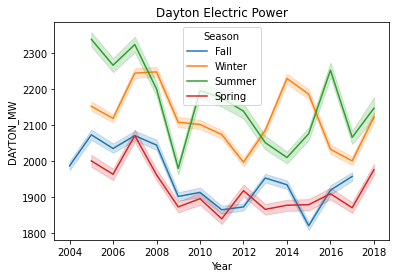

<Figure size 1440x1440 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
ax=sns.lineplot(x='Year',y='DAYTON_MW',hue='Season',data=df)
plt.title("Dayton Electric Power")
plt.figure(figsize=(20,20))
plt.show()


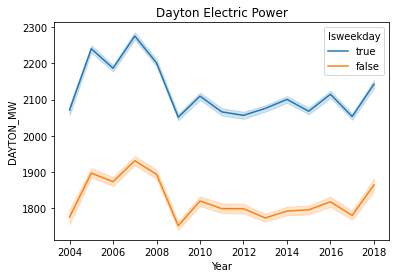

<Figure size 1440x1440 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
ax=sns.lineplot(x='Year',y='DAYTON_MW',hue='Isweekday',data=df)
plt.title("Dayton Electric Power")
plt.figure(figsize=(20,20))
plt.show()


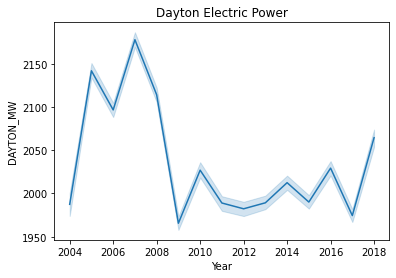

In [16]:
ax=sns.lineplot(x='Year',y='DAYTON_MW',data=df)
plt.title("Dayton Electric Power")
plt.show()


In [17]:
df = pd.read_csv('DAYTON_hourly.csv', index_col='Datetime', parse_dates=['Datetime'])
df.head()

,DAYTON_MW
Datetime,
2004-12-31 01:00:00,1596.0
2004-12-31 02:00:00,1517.0
2004-12-31 03:00:00,1486.0
2004-12-31 04:00:00,1469.0
2004-12-31 05:00:00,1472.0


In [18]:
import pandas as pd
import datetime as dt
import seaborn as sns
from keras.layers import Dense,Dropout,SimpleRNN,LSTM
from keras.models import Sequential
import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing

In [19]:
def normalize_data(df):
    scaler = sklearn.preprocessing.MinMaxScaler()
    df['DAYTON_MW']=scaler.fit_transform(df['DAYTON_MW'].values.reshape(-1,1))
    return df

df_norm = normalize_data(df)
df_norm.shape

(121275, 1)

In [20]:
df.head()

,DAYTON_MW
Datetime,
2004-12-31 01:00:00,0.222142
2004-12-31 02:00:00,0.193560
2004-12-31 03:00:00,0.182344
2004-12-31 04:00:00,0.176194
2004-12-31 05:00:00,0.177279


In [21]:
def load_data(stock, seq_len):
    X_train = []
    y_train = []
    for i in range(seq_len, len(stock)):
        X_train.append(stock.iloc[i-seq_len : i, 0])
        y_train.append(stock.iloc[i, 0])
    
    #1 last 6189 days are going to be used in test
    X_test = X_train[110000:]             
    y_test = y_train[110000:]
    
    #2 first 110000 days are going to be used in training
    X_train = X_train[:110000]           
    y_train = y_train[:110000]
    
    #3 convert to numpy array
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    #4 reshape data to input into RNN models
    X_train = np.reshape(X_train, (110000, seq_len, 1))
    
    X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))
    
    return [X_train, y_train, X_test, y_test]


In [22]:
seq_len = 20 #choose sequence length

X_train, y_train, X_test, y_test = load_data(df, seq_len)

print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ',y_test.shape)


X_train.shape =  (110000, 20, 1)
y_train.shape =  (110000,)
X_test.shape =  (11255, 20, 1)
y_test.shape =  (11255,)


In [23]:
rnn_model = Sequential()

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=True))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=False))
rnn_model.add(Dropout(0.15))

rnn_model.add(Dense(1))

rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 20, 40)            1680      
                                                                 
 dropout (Dropout)           (None, 20, 40)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 20, 40)            3240      
                                                                 
 dropout_1 (Dropout)         (None, 20, 40)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 40)                3240      
                                                                 
 dropout_2 (Dropout)         (None, 40)                0         
                                                                 
 dense (Dense)               (None, 1)                 4

In [24]:
rnn_model.compile(optimizer="adam",loss="MSE")
rnn = rnn_model.fit(X_train, y_train, epochs=5,validation_split=0.3, batch_size=1000)

Epoch 1/5
77/77 [==============================] - 7s 40ms/step - loss: 0.1095 - val_loss: 0.0055
Epoch 2/5
77/77 [==============================] - 3s 35ms/step - loss: 0.0289 - val_loss: 0.0024
Epoch 3/5
77/77 [==============================] - 3s 35ms/step - loss: 0.0156 - val_loss: 0.0017
Epoch 4/5
77/77 [==============================] - 3s 36ms/step - loss: 0.0106 - val_loss: 0.0015
Epoch 5/5
77/77 [==============================] - 3s 35ms/step - loss: 0.0082 - val_loss: 0.0012


In [25]:
from sklearn.metrics import r2_score
rnn_predictions = rnn_model.predict(X_test)

rnn_score = r2_score(y_test,rnn_predictions)
print("R2 Score of RNN model = ",rnn_score)

352/352 [==============================] - 2s 6ms/step
R2 Score of RNN model =  0.9346181597065008


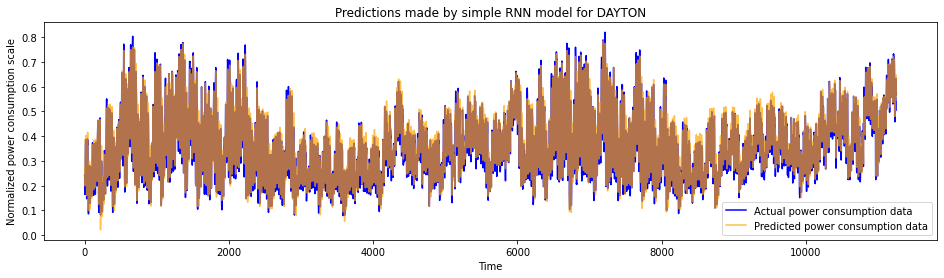

In [26]:
def plot_predictions(test, predicted, title):
    plt.figure(figsize=(16,4))
    plt.plot(test, color='blue',label='Actual power consumption data')
    plt.plot(predicted, alpha=0.7, color='orange',label='Predicted power consumption data')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Normalized power consumption scale')
    plt.legend()
    plt.show()
    
plot_predictions(y_test, rnn_predictions, "Predictions made by simple RNN model for DAYTON")

In [27]:
lstm_model = Sequential()

lstm_model.add(LSTM(40,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40,activation="tanh",return_sequences=True))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40,activation="tanh",return_sequences=False))
lstm_model.add(Dropout(0.15))

lstm_model.add(Dense(1))

lstm_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 40)            6720      
                                                                 
 dropout_3 (Dropout)         (None, 20, 40)            0         
                                                                 
 lstm_1 (LSTM)               (None, 20, 40)            12960     
                                                                 
 dropout_4 (Dropout)         (None, 20, 40)            0         
                                                                 
 lstm_2 (LSTM)               (None, 40)                12960     
                                                                 
 dropout_5 (Dropout)         (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [28]:
lstm_model.compile(optimizer="adam",loss="MSE")
lstm=lstm_model.fit(X_train, y_train, epochs=5,validation_split=0.3, batch_size=1000)

Epoch 1/5
77/77 [==============================] - 8s 25ms/step - loss: 0.0263 - val_loss: 0.0143
Epoch 2/5
77/77 [==============================] - 1s 11ms/step - loss: 0.0172 - val_loss: 0.0127
Epoch 3/5
77/77 [==============================] - 1s 10ms/step - loss: 0.0134 - val_loss: 0.0058
Epoch 4/5
77/77 [==============================] - 1s 10ms/step - loss: 0.0072 - val_loss: 0.0040
Epoch 5/5
77/77 [==============================] - 1s 10ms/step - loss: 0.0057 - val_loss: 0.0029


In [29]:
lstm_predictions = lstm_model.predict(X_test)

lstm_score = r2_score(y_test, lstm_predictions)
print("R^2 Score of LSTM model = ",lstm_score)


352/352 [==============================] - 2s 3ms/step
R^2 Score of LSTM model =  0.8538779119415945


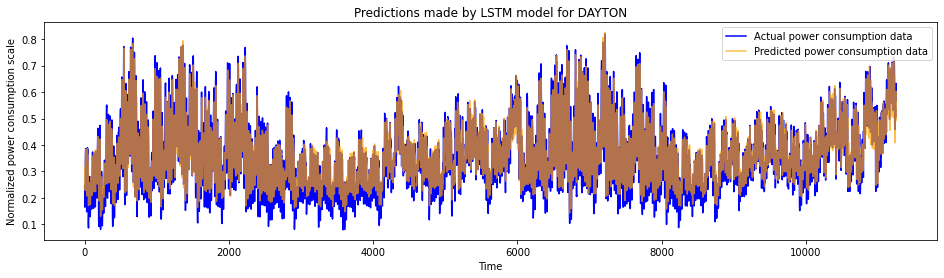

In [30]:
plot_predictions(y_test, lstm_predictions, "Predictions made by LSTM model for DAYTON")


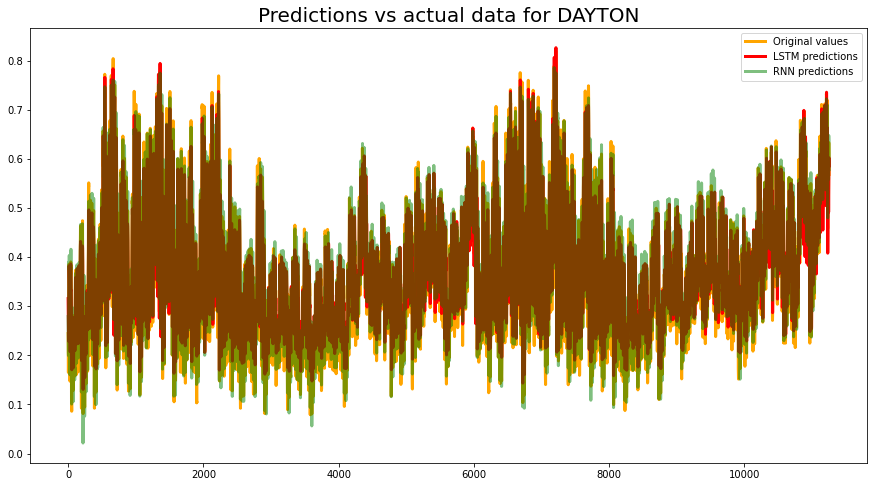

In [31]:
plt.figure(figsize=(15,8))

plt.plot(y_test, c="orange", linewidth=3, label="Original values")
plt.plot(lstm_predictions, c="red", linewidth=3, label="LSTM predictions")
plt.plot(rnn_predictions, alpha=0.5, c="green", linewidth=3, label="RNN predictions")
plt.legend()
plt.title("Predictions vs actual data for DAYTON", fontsize=20)
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(mean_squared_error(y_test, lstm_predictions))  # MSE

print(mean_squared_error(y_test, lstm_predictions, squared=False) ) #rmse

print(mean_absolute_error(y_test, lstm_predictions)) # MAE

0.0026584011490061294
0.051559685307477676
0.040421869286054506


In [33]:
print(mean_squared_error(y_test, rnn_predictions))  # MSE

print(mean_squared_error(y_test, rnn_predictions, squared=False) ) #rmse  

print(mean_absolute_error(y_test, rnn_predictions)) # MAE

0.0011894927157823033
0.0344890231201509
0.02627634809591771


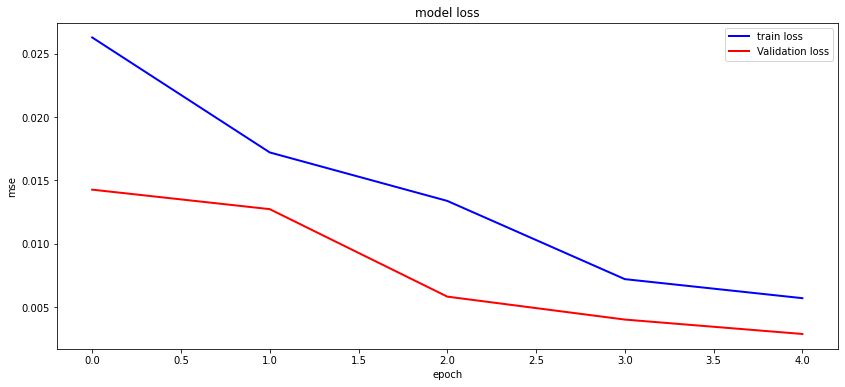

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,6))
ax.plot(lstm.history['loss'], 'b' ,label = 'train loss', linewidth=2)
ax.plot(lstm.history['val_loss'], 'r', label ='Validation loss', linewidth=2)
ax.set_title('model loss')
ax.set_ylabel('mse')
ax.set_xlabel('epoch')
ax.legend()
plt.show()

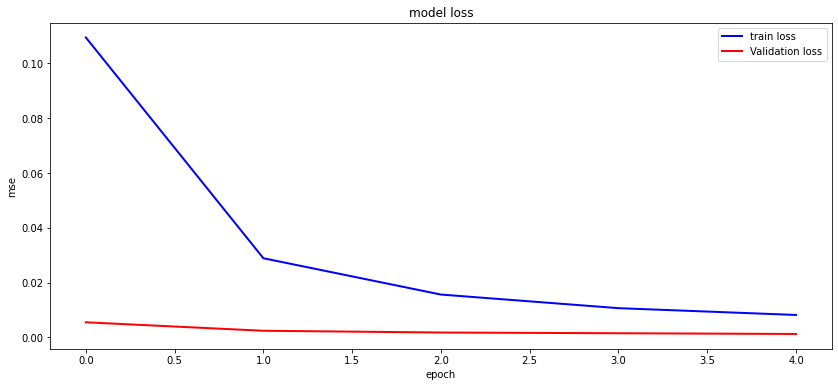

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,6))
ax.plot(rnn.history['loss'], 'b' ,label = 'train loss', linewidth=2)
ax.plot(rnn.history['val_loss'], 'r', label ='Validation loss', linewidth=2)
ax.set_title('model loss')
ax.set_ylabel('mse')
ax.set_xlabel('epoch')
ax.legend()
plt.show()

In [36]:
df=pd.read_csv('DAYTON_hourly.csv', index_col=[0], parse_dates=[0])

In [37]:
split_date = '01-Jan-2016'
df_train = df.loc[df.index <= split_date].copy()
df_test = df.loc[df.index > split_date].copy()

In [38]:
def create_features(df, label=None):
  df['date'] = df.index
  df['hour'] = df['date'].dt.hour
  df['dayofweek'] = df['date'].dt.dayofweek
  df['quarter'] = df['date'].dt.quarter
  df['month'] = df['date'].dt.month
  df['year'] = df['date'].dt.year
  df['dayofyear'] = df['date'].dt.dayofyear
  df['dayofmonth'] = df['date'].dt.day
  df['weekofyear'] = df['date'].dt.weekofyear

  print(df.head())
  x = df[['hour','dayofweek','quarter','month','year','dayofyear','dayofmonth',
          'weekofyear']]
  if label:
    y = df[label]
    return x, y
  return x

In [39]:
x_train, y_train = create_features(df_train, label='DAYTON_MW')
x_test, y_test = create_features(df_test, label='DAYTON_MW')

                     DAYTON_MW                date  hour  dayofweek  quarter  \
Datetime                                                                       
2004-12-31 01:00:00     1596.0 2004-12-31 01:00:00     1          4        4   
2004-12-31 02:00:00     1517.0 2004-12-31 02:00:00     2          4        4   
2004-12-31 03:00:00     1486.0 2004-12-31 03:00:00     3          4        4   
2004-12-31 04:00:00     1469.0 2004-12-31 04:00:00     4          4        4   
2004-12-31 05:00:00     1472.0 2004-12-31 05:00:00     5          4        4   

                     month  year  dayofyear  dayofmonth  weekofyear  
Datetime                                                             
2004-12-31 01:00:00     12  2004        366          31          53  
2004-12-31 02:00:00     12  2004        366          31          53  
2004-12-31 03:00:00     12  2004        366          31          53  
2004-12-31 04:00:00     12  2004        366          31          53  
2004-12-31 05:00:00

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
reg = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=1000)
xg=reg.fit(x_train, y_train,
        eval_set = [(x_train, y_train), (x_test, y_test)],
        early_stopping_rounds = 50,
        verbose = True)

[0]	validation_0-rmse:1876.82	validation_1-rmse:1846.51
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:1694.05	validation_1-rmse:1662.84
[2]	validation_0-rmse:1530.03	validation_1-rmse:1501.72
[3]	validation_0-rmse:1382.88	validation_1-rmse:1357.46
[4]	validation_0-rmse:1250.96	validation_1-rmse:1224.65
[5]	validation_0-rmse:1132.87	validation_1-rmse:1106.28
[6]	validation_0-rmse:1027.19	validation_1-rmse:999.997
[7]	validation_0-rmse:932.842	validation_1-rmse:907.113
[8]	validation_0-rmse:848.629	validation_1-rmse:825.691
[9]	validation_0-rmse:771.72	validation_1-rmse:748.669
[10]	validation_0-rmse:704.883	validation_1-rmse:686.052
[11]	validation_0-rmse:643.681	validation_1-rmse:624.899
[12]	validation_0-rmse:589.391	validation_1-rmse:570.852
[13]	validation_0-rmse:542.681	validation_1-rmse:527.66
[14]	validation_0-rmse:499.825	validation_1-rmse:485.26

In [ ]:
df_test['MW_prediction'] = reg.predict(x_test)
df_all = pd.concat([df_test, df_train], sort=False)